Walmart Recruiting - Store Sales Forecasting Use historical markdown data to predict store sales.

1. Select a dataset - any dataset! Make sure it's not too dirty, as this case study is
about storytelling, not cleaning...
2. Pick your audience: executive, technical, or non-technical; and adjust your tone
accordingly.
3. Take a look at the data: explore it.
4. Think of a narrative, and pursue it.
5. Give a 15 mins presentation to your mentor during your next call.
In your quest, you might need to ask a bunch of other questions, such as:
● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities? 
● Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask?
The questions you asked
● The trends you investigated
● The resulting visualizations and conclusions

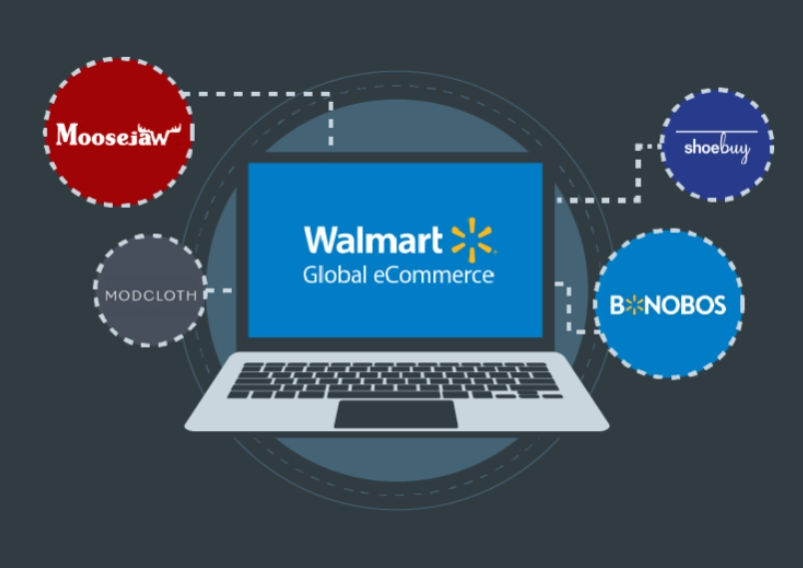

# 1. Select a dataset

In [30]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
dt1 = pd.read_csv('features.csv/features.csv')
dt2 = pd.read_csv('stores.csv')
dt3 = pd.read_csv('train.csv/train.csv')

# 2.Pick your audience, non-technical

In [23]:
dt1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [24]:
dt2.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [25]:
dt3.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [26]:
data = pd.merge(dt1,dt3,on=['Store','Date','IsHoliday'],how='inner')
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38


In [50]:
data['Date'] = pd.to_datetime(data['Date'])
dt_year = pd.DatetimeIndex(data['Date']).year
print('The highest Weekly Sales from 2010 to 2012 is: $',data['Weekly_Sales'].max())
print('The lowest Weekly Sales from 2010 to 2012 is: $',data['Weekly_Sales'].min())

The highest Weekly Sales from 2010 to 2012 is: $ 693099.36
The lowest Weekly Sales from 2010 to 2012 is: $ -4988.94


Find out relationsips between weekly sales and other features.

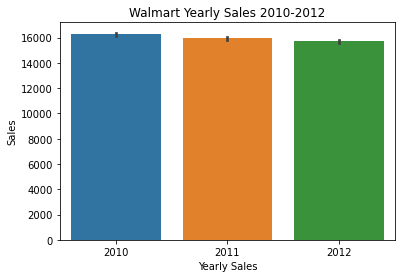

In [45]:
sns.barplot(dt_year,data['Weekly_Sales'])
plt.xlabel('Yearly Sales')
plt.ylabel('Sales')
plt.title('Walmart Yearly Sales 2010-2012')
plt.show()
#Based on this barplot we can notice that there is a slightly decrease in sales from 2010 to 2012.

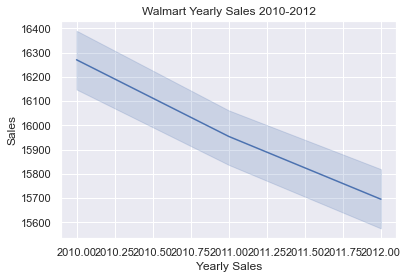

In [46]:
sns.set_theme(style="darkgrid")
sns.lineplot(dt_year,data['Weekly_Sales'])
plt.xlabel('Yearly Sales')
plt.ylabel('Sales')
plt.title('Walmart Yearly Sales 2010-2012')
plt.show()
#By looking at the line graph, it is more obvious that walmart is experiencing a decrease in sales graduatlly.

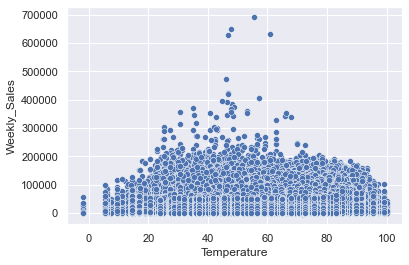

In [57]:
_ = sns.scatterplot(data = data, x = data['Temperature'], y = data['Weekly_Sales'])
# According to this graph, we can detect that the weekly sales could decrease when temperature gets too high or too low. Also 
# the sales gets peak value at around 50 F to 60 F.

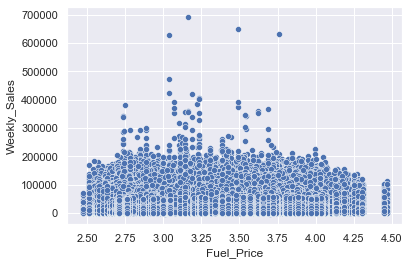

In [54]:
_ = sns.scatterplot(data = data, x = data['Fuel_Price'], y = data['Weekly_Sales'])
# By looking at this graph, we can know that when the fuel price gets too high, sales gets affected negatively. 

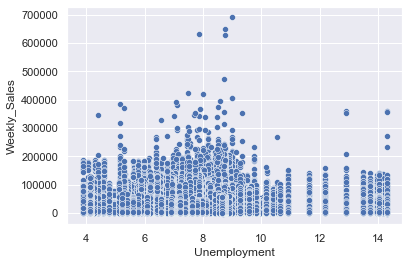

In [55]:
_ = sns.scatterplot(data=data, x = data['Unemployment'], y = data['Weekly_Sales'])

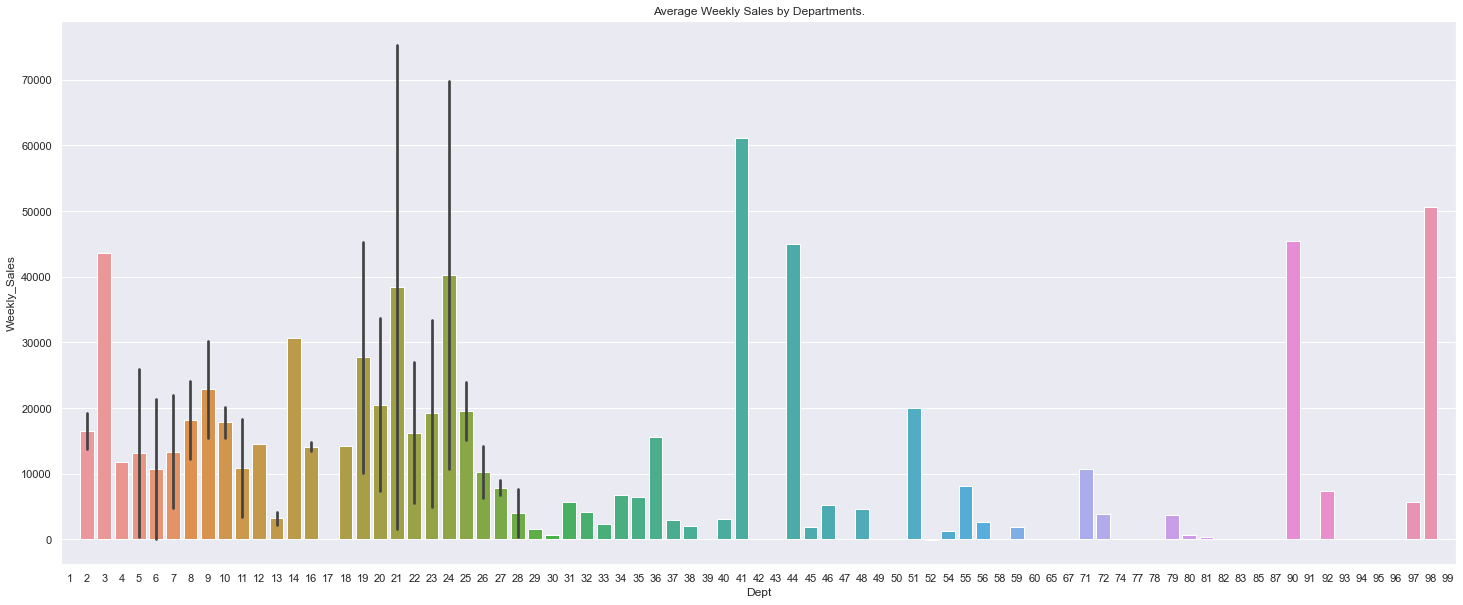

In [69]:
plt.figure(figsize=(25,10))
_ = sns.barplot(data=data, x = data['Dept'], y = data['Weekly_Sales'].groupby(data['Dept']).mean())
plt.title('Average Weekly Sales by Departments.')
plt.show()

By looking at the barplot we can see some departments have great sales while some departments have extremel